In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import seaborn as sea
from scipy.stats import norm, binom
from etc import *

''

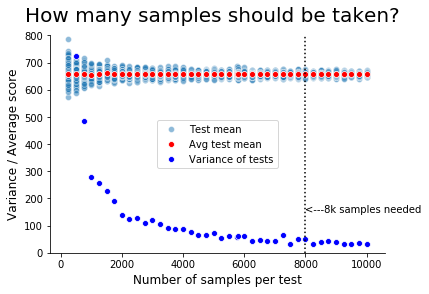

In [60]:
df = pd.read_csv('../data/batchtests.csv')
mean = df.groupby('batch_size').mean()
std = df.groupby('batch_size').var()
fig, ax = plt.subplots()
ax = sea.scatterplot(
    df['batch_size'], 
    df['mean'], 
    alpha=.5,
    label='Test mean')
ax = sea.scatterplot(mean['mean'].index,mean['mean'],color = 'r',label='Avg test mean')
ax = sea.scatterplot(std['mean'].index,std['mean'],color='b',label='Variance of tests')
plt.ylim(bottom=0, top=800);
plt.legend()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_ylabel('Variance / Average score', fontsize=12)
ax.set_xlabel('Number of samples per test', fontsize=12)
fig.suptitle('How many samples should be taken?', fontsize=20)
ax.axvline(8000, color='k', linestyle=':')
ax.text(8000,150, '<---8k samples needed')
#plt.savefig('..')
;

''

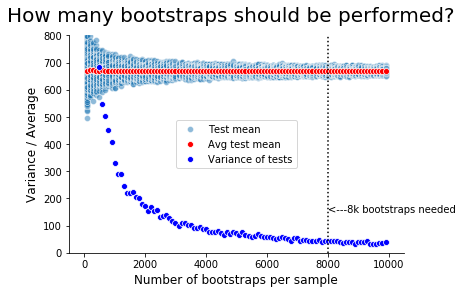

In [61]:
scores = pd.read_csv('../data/perfect.csv')
xplots = []
yplots = []
for bootstrap_size in range(100, 10000, 100):
    for plots in range(500):
        xplots.append(bootstrap_size)
        yplots.append(
            np.random.choice(
            a=scores['score'],
            size=bootstrap_size,
            replace=True).mean()
        )   
        
df = pd.DataFrame(zip(xplots, yplots), columns=['boot_size','mean'])
mean = df.groupby('boot_size').mean()
std = df.groupby('boot_size').var()

fig, ax = plt.subplots()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax = sea.scatterplot(xplots,yplots,alpha=.5,label='Test mean')
ax = sea.scatterplot(mean['mean'].index,mean['mean'],color ='r',label='Avg test mean')
ax = sea.scatterplot(std['mean'].index,std['mean'],color ='b',label='Variance of tests')
plt.ylim(bottom=0, top=800);
plt.legend()
ax.set_ylabel('Variance / Average', fontsize=12)
ax.set_xlabel('Number of bootstraps per sample', fontsize=12)
fig.suptitle('How many bootstraps should be performed?', fontsize=20)
ax.axvline(8000, color='k', linestyle=':')
ax.text(8000,150, '<---8k bootstraps needed')
;

In [55]:
def get_dist(df):
    mean = []
    std = []
    for _ in range(8000):
        boot = np.random.choice(a=df['score'],size=8000,replace=True)
        mean.append(boot.mean())
        std.append(boot.std())
    return norm(np.mean(mean), (np.mean(std)/np.sqrt(8000)) )


''

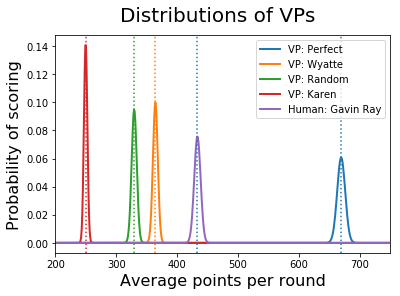

In [56]:
fig, ax = plt.subplots()
x = np.linspace(0, 2000, num=2000)

df = pd.read_csv('../game/data/perfect.csv')
ax.plot(x,get_dist(df).pdf(x),linewidth=2,label='VP: Perfect')
ax.axvline(df['score'].mean(),color='C0',linestyle=':')

df1 = pd.read_csv('../game/data/wyatte.csv')
df1.score.where(df1.outcome,0,inplace=True)
ax.plot(x,get_dist(df1).pdf(x),linewidth=2,label='VP: Wyatte')
ax.axvline(df1['score'].mean(),color='C1',linestyle=':')

df2 = pd.read_csv('../game/data/random.csv')
df2.score.where(df2.outcome,0,inplace=True)
ax.plot(x, get_dist(df2).pdf(x), linewidth=2, label='VP: Random')
ax.axvline(df2['score'].mean(),color='C2',linestyle=':')

df3 = pd.read_csv('../game/data/karen.csv')
df3.score.where(df3.outcome,0,inplace=True)
ax.plot(x, get_dist(df3).pdf(x), linewidth=2, label='VP: Karen')
ax.axvline(df3['score'].mean(),color='C3',linestyle=':')


df4 = pd.read_csv('../game/data/terminal.csv')
df4.score.where(df4.outcome,0,inplace=True)
ax.plot(x,get_dist(df4).pdf(x),linewidth=2,label='Human: Gavin Ray')
ax.axvline(df4['score'].mean(),color='C0',linestyle=':')

ax.set_xlim(200,750)
ax.legend()
ax.set_ylabel('Probability of scoring', fontsize=16)
ax.set_xlabel('Average points per round', fontsize=16)
fig.suptitle('Distributions of VPs', fontsize=20)
#plt.savefig()
;